# Double 7's Portfolio
    
    (Optimize period and weighting scheme)

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
# Symbol Lists
symbol = 'SPY'
capital = 10000
start = datetime.datetime(*pf.ALPHA_BEGIN)
#start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

In [4]:
options = {
    'use_adj' : False,
    'use_cache' : True,
    'margin' : 1.0,
    'periods' : [3,4,5,6,7,8,9,10,11,12],
    'sma' : 70,
    'use_regime_filter' : True,
}

Define Optimizations

In [5]:
# pick one
optimize_num_periods = True

if optimize_num_periods:
    Xs = range(1, 10+1, 1)
    Xs = [str(X) for X in Xs]

Run Strategy

In [6]:
strategies = pd.Series(dtype=object)
for X in Xs:
    print(X, end=" ")
    if optimize_num_periods:
        if int(X) == 1: periods  = [7]
        if int(X) == 2: periods  = [6,7]
        if int(X) == 3: periods  = [6,7,8]
        if int(X) == 4: periods  = [6,7,8,9]
        if int(X) == 5: periods  = [5,6,7,8,9]
        if int(X) == 6: periods  = [5,6,7,8,9,10]
        if int(X) == 7: periods  = [4,5,6,7,8,9,10]
        if int(X) == 8: periods  = [4,5,6,7,8,9,10,11]
        if int(X) == 9: periods  = [3,4,5,6,7,8,9,10,11]
        if int(X) == 10: periods = [3,4,5,6,7,8,9,10,11,12]

        options['periods'] = periods

    strategies[X] = strategy.Strategy(symbol, capital, start, end, options)
    strategies[X].run()

1 2 3 4 5 6 7 8 9 10 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'annualized_return_over_max_drawdown',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = pf.optimizer_summary(strategies, metrics)
df

,1,2,3,4,5,6,7,8,9,10
annual_return_rate,8.46,8.23,7.93,7.70,7.65,7.52,7.59,7.48,7.39,7.24
max_closed_out_drawdown,-14.01,-14.00,-15.14,-19.50,-16.86,-18.76,-16.92,-18.54,-17.11,-18.75
annualized_return_over_max_drawdown,0.60,0.59,0.52,0.39,0.45,0.40,0.45,0.40,0.43,0.39
best_month,12.89,11.06,11.44,11.85,10.89,10.46,9.98,9.61,10.02,9.57
worst_month,-13.51,-13.51,-14.55,-18.63,-16.16,-17.89,-16.18,-17.67,-16.35,-17.87
sharpe_ratio,0.83,0.84,0.81,0.80,0.82,0.80,0.83,0.82,0.83,0.82
sortino_ratio,0.65,0.67,0.65,0.64,0.68,0.67,0.71,0.70,0.73,0.72
monthly_std,2.22,2.07,2.11,2.10,2.00,1.99,1.92,1.93,1.86,1.87
pct_time_in_market,32.31,36.02,38.25,40.53,43.68,44.83,48.68,50.11,54.72,56.08
total_num_trades,303.00,671.00,932.00,1153.00,1598.00,1800.00,2374.00,2556.00,3384.00,3550.00


Bar graphs

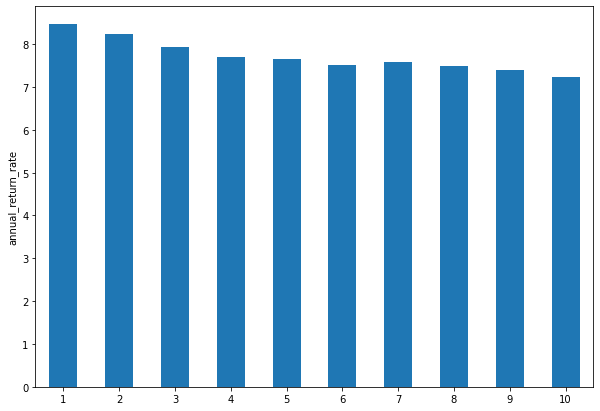

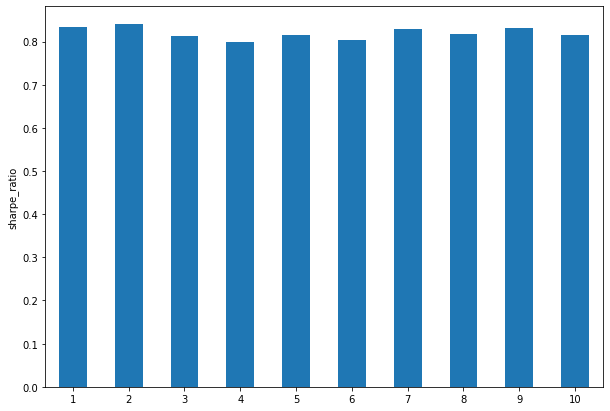

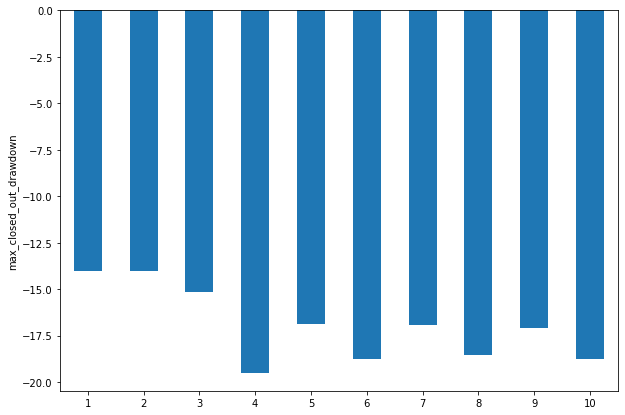

In [8]:
pf.optimizer_plot_bar_graph(df, 'annual_return_rate')
pf.optimizer_plot_bar_graph(df, 'sharpe_ratio')
pf.optimizer_plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[Xs[0]]
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()

Equity curve

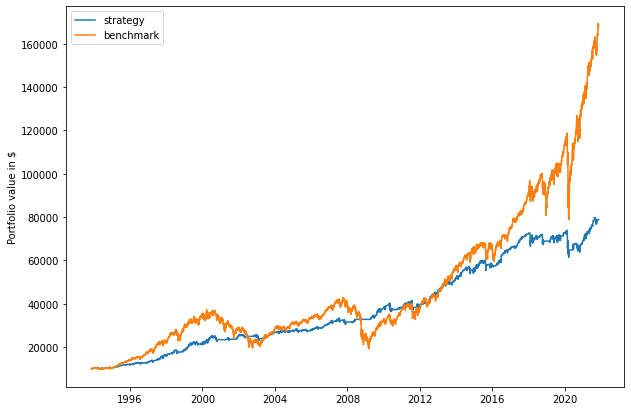

In [10]:
if   optimize_num_periods: Y = '5'

pf.plot_equity_curve(strategies[Y].dbal, benchmark=benchmark.dbal)

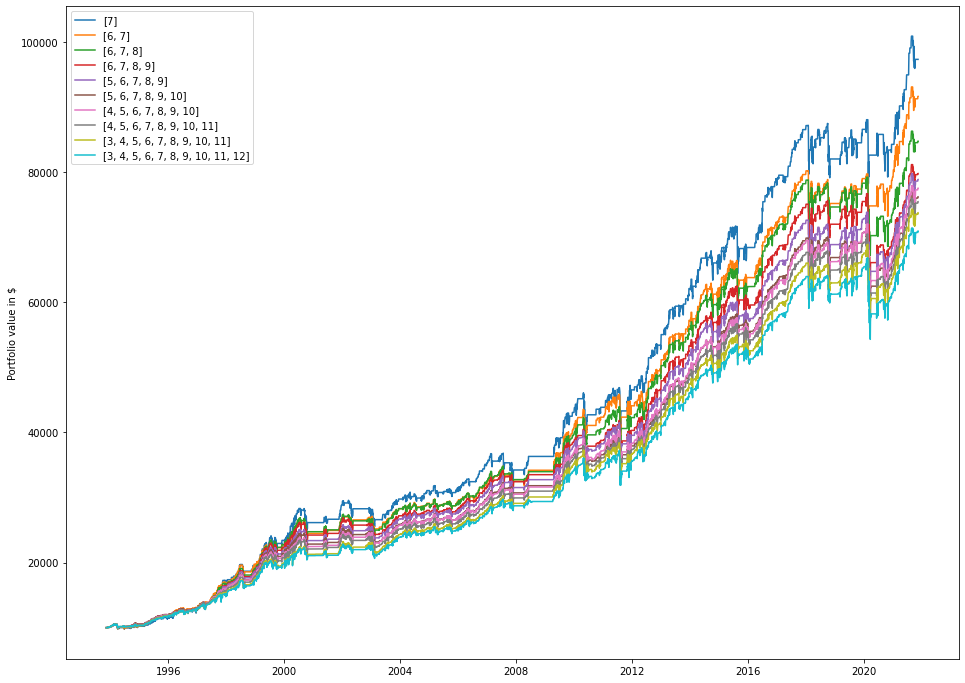

In [11]:
labels = []
for strategy in strategies:
    if optimize_num_periods:
        label = strategy.options['periods']

    labels.append(label)

pf.plot_equity_curves(strategies, labels)